In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 基础条形图绘制：

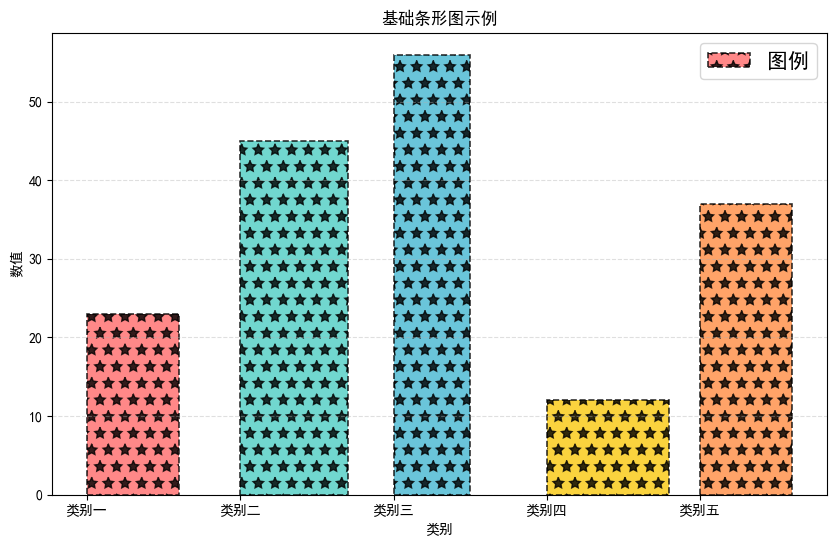

In [3]:
# 数据准备
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 12, 37]
# 自定义颜色：为每个条形设置不同的填充色
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E', '#FF8C42']

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制条形图
bars =plt.bar(
            categories,          # x轴数据（类别）
            values,              # y轴数据（数值）
            align='edge',        # 条形边缘与刻度线对齐
            color=colors,        # 条形填充色，使用自定义颜色列表
            edgecolor='black',   # 条形边框颜色
            linewidth=1.2,       # 边框线宽
            linestyle='--',      # 边框线型（虚线）
            width=[0.6, 0.7, 0.5, 0.8, 0.6],  # 每个条形的宽度（可不同）
            alpha=0.8,           # 透明度（0-1之间）
            tick_label=['类别一', '类别二', '类别三', '类别四', '类别五'],  # x轴刻度标签
            hatch='*',           # 条形内部填充图案（星号）
            label='图例'         # 用于图例显示的标签
)

plt.title('基础条形图示例')
plt.xlabel('类别')
plt.ylabel('数值')
plt.legend(fontsize=15) # 图例
plt.grid(axis='y', alpha=0.4, linestyle='--')  # 添加网格线

# 显示图形
plt.show()

# 示例 1：顶端标注数值

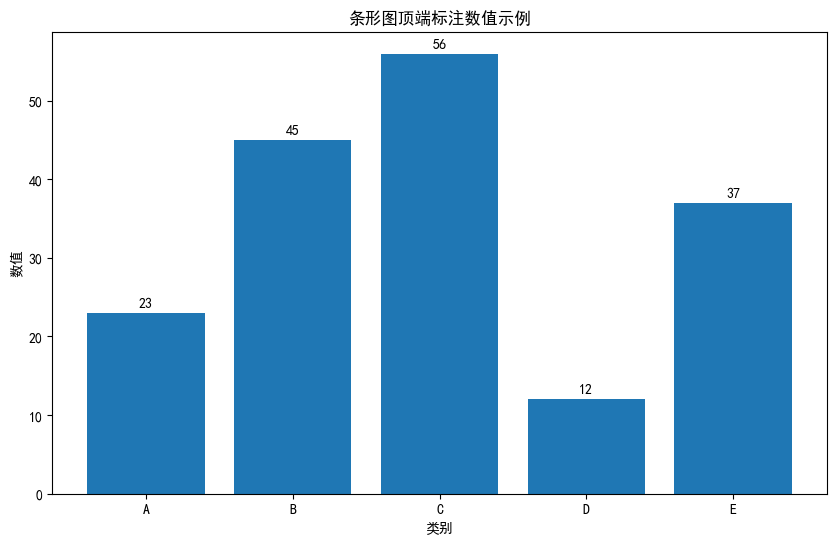

In [4]:
# 数据准备
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 12, 37]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制条形图
bars =plt.bar(categories, values,)

# 在条形上添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom')

plt.title('条形图顶端标注数值示例')
plt.xlabel('类别')
plt.ylabel('数值')

# 显示图形
plt.show()

# 示例 2：多数据长条图：

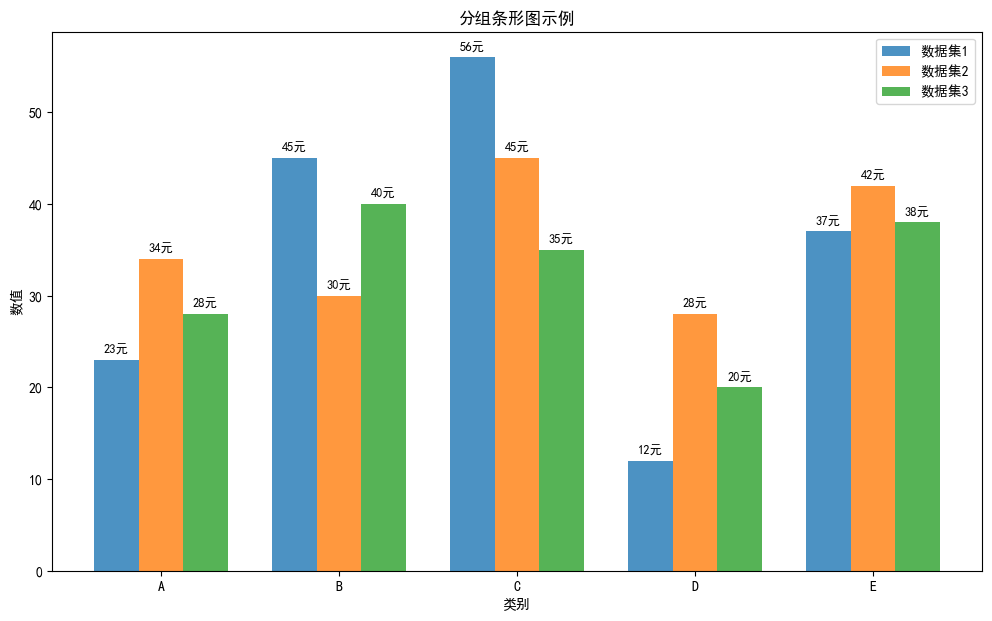

In [5]:
# 准备多组数据
values1 = [23, 45, 56, 12, 37]
values2 = [34, 30, 45, 28, 42]
values3 = [28, 40, 35, 20, 38]

x = np.arange(len(categories))  # 类别位置
width = 0.25  # 条形宽度

plt.figure(figsize=(12, 7))

# 绘制分组条形图
bars1 = plt.bar(x - width, values1, width, label='数据集1', alpha=0.8)
bars2 = plt.bar(x, values2, width, label='数据集2', alpha=0.8)
bars3 = plt.bar(x + width, values3, width, label='数据集3', alpha=0.8)

# 6. 添加数值标注（分别为两组长条添加）
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height}元', ha='center', va='bottom', fontsize=9)

plt.title('分组条形图示例')
plt.xlabel('类别')
plt.ylabel('数值')
plt.xticks(x, categories)  # 设置x轴刻度标签
plt.legend()  # 显示图例
plt.show()

# 示例 3：堆叠图

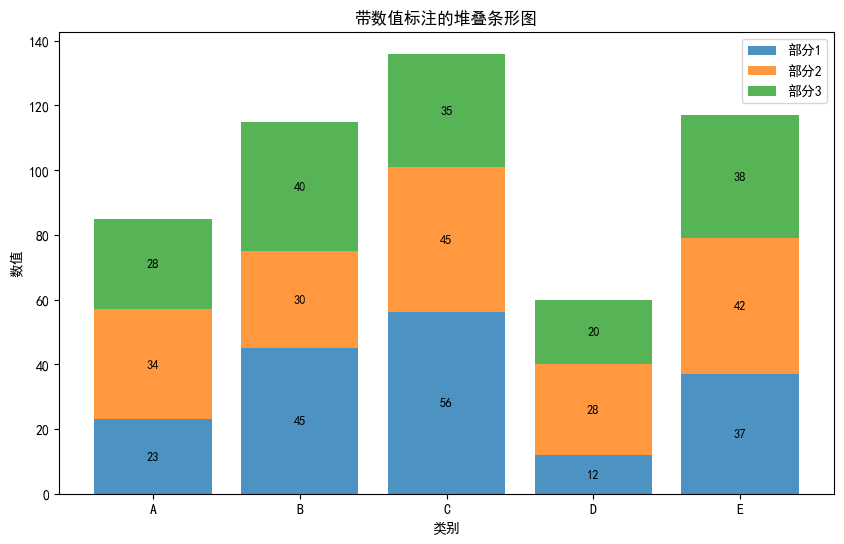

In [6]:
# 准备多组数据
values1 = [23, 45, 56, 12, 37]
values2 = [34, 30, 45, 28, 42]
values3 = [28, 40, 35, 20, 38]
categories = ['A', 'B', 'C', 'D', 'E']

plt.figure(figsize=(10, 6))

# 绘制堆叠条形图
bars1 =plt.bar(categories, values1, label='部分1', alpha=0.8)
bars2 =plt.bar(categories, values2, bottom=values1, label='部分2', alpha=0.8)
bars3 =plt.bar(categories, values3, bottom=np.array(values1) + np.array(values2), 
        label='部分3', alpha=0.8)

# 标注第一部分数值
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{height}', ha='center', va='center', fontsize=9)

# 标注第二部分数值（位置需加上第一部分高度）
for i, bar in enumerate(bars2):
    height = bar.get_height()
    bottom = values1[i]  # 第一部分的高度作为第二部分的底部
    plt.text(bar.get_x() + bar.get_width()/2., bottom + height/2,
             f'{height}', ha='center', va='center', fontsize=9)

# 标注第三部分数值（位置需加上前两部分高度之和）
for i, bar in enumerate(bars3):
    height = bar.get_height()
    bottom = values1[i] + values2[i]  # 前两部分高度之和作为第三部分的底部
    plt.text(bar.get_x() + bar.get_width()/2., bottom + height/2,
             f'{height}', ha='center', va='center', fontsize=9)

plt.title('带数值标注的堆叠条形图')
plt.xlabel('类别')
plt.ylabel('数值')
plt.legend()
plt.show()

# 示例 4：添加误差条:

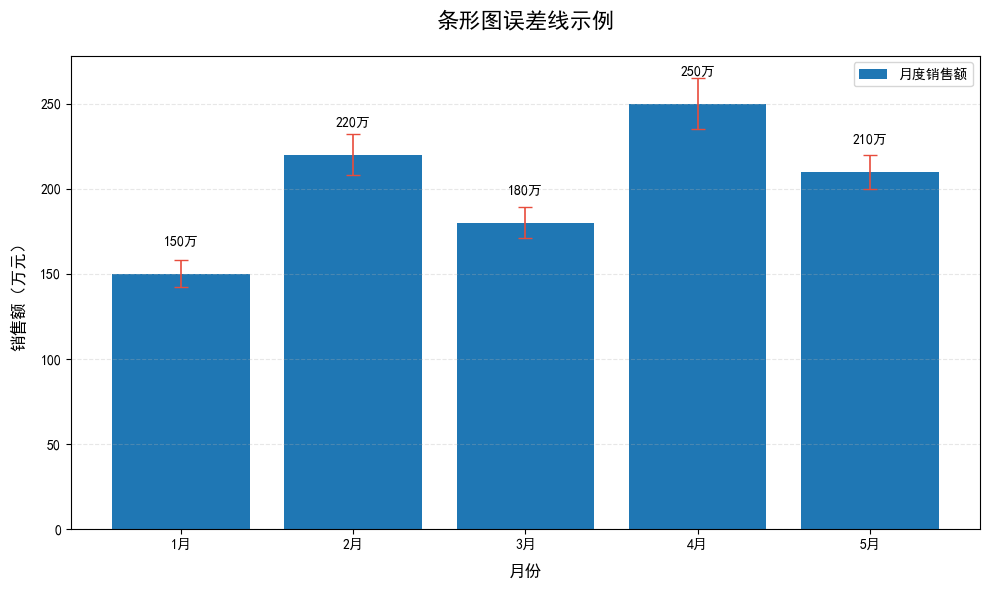

In [7]:
# 1. 准备数据（销售额+对应的标准差）
months = ['1月', '2月', '3月', '4月', '5月']
sales = [150, 220, 180, 250, 210]  # 销售额（万元）
sales_std = [8, 12, 9, 15, 10]     # 每个月销售额的标准差（误差范围）

# 2. 创建画布
plt.figure(figsize=(10, 6), dpi=100)

# 3. 绘制带垂直误差条的长条图
bars = plt.bar(
    x=months,
    height=sales,
    label='月度销售额',
    yerr=sales_std,          # 添加垂直误差条（使用标准差作为误差）
    capsize=5,               # 误差条横线帽长度（5磅）
    error_kw={               # 误差条样式配置（通过error_kw传入）
        'ecolor': '#E74C3C', # 误差条颜色（红色，与长条区分）
        'linewidth': 1.2     # 误差条线宽
    }
)

# 4. 完善图表元素（参考基础案例）
plt.title('条形图误差线示例', fontsize=16, pad=20)
plt.xlabel('月份', fontsize=12, labelpad=10)
plt.ylabel('销售额（万元）', fontsize=12, labelpad=10)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 5. 添加数值标注
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 15,  # 位置高于误差条顶部
        f'{height}万',
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()